# Notch and Crack Problem
<img src="Notch_Crack_problem.png">

In [1]:
from polarUtilities import *
from IPython.display import Math, Latex
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = sp.Function('f')(theta)
l = sp.Symbol('lambda')

For our simplicity we assume stresses to vary with $r^n$. Hence *Stress Function, $\phi$* can be assumed to vary with $r^{n+2}$. Since constants do not affect the solution, we take $\phi\propto r^n$. Thus finally we choose $\phi = r^\lambda f(\theta)$ where $\lambda$ is any specific value of n satisfying the problem conditions.

In [3]:
phi = r**(l)*f
display(Math(r'\phi = {}'.format(sp.latex(phi))))

<IPython.core.display.Math object>

Computing the polar Laplacian $\nabla^2 \phi$ according to our assumed $\phi$-

In [4]:
polarLaplacian(phi)

r**(lambda - 2)*(lambda**2*f(theta) + Derivative(f(theta), (theta, 2)))

The biharmonic equation is $\nabla^4 \phi = 0$. This is used to obtain the $\theta$ dependent part of $\phi$ i.e. $f(\theta)$.

In [5]:
lhs = polarbiharmonic(phi)
rhs = 0
biharmonic_eq = sp.Eq(lhs,rhs)
display(biharmonic_eq.simplify())

Eq(r**(lambda - 4)*(lambda**4*f(theta) - 4*lambda**3*f(theta) + 4*lambda**2*f(theta) + 2*lambda**2*Derivative(f(theta), (theta, 2)) - 4*lambda*Derivative(f(theta), (theta, 2)) + 4*Derivative(f(theta), (theta, 2)) + Derivative(f(theta), (theta, 4))), 0)

In [6]:
f_s = sp.dsolve(biharmonic_eq,f)
display(Math(r'{}'.format(sp.latex(f_s))))

<IPython.core.display.Math object>

We can obtain the simplified version of *Stress Function*, $\phi$ from the results obtained above. In order to follow continuity with the book *Elasticity by Barber*, $\phi$ is defined as below-

In [7]:
A, B, C, D = sp.symbols('A, B, C, D')
phi = r**l*(A*sp.sin(l*theta) + B*sp.cos(l*theta) + C*sp.sin((l-2)*theta) + D*sp.cos((l-2)*theta))
display(Math(r'\phi = {}'.format(sp.latex(phi))))

<IPython.core.display.Math object>

In [8]:
sigmarr = sp.collect(sigma_rr(phi),(A,B,C,D)).simplify()
sigmatt = sp.collect(sigma_tt(phi),(A,B,C,D)).simplify()
sigmart = sp.collect(sigma_rt(phi),(A,B,C,D)).simplify()

display(Math(r' \sigma_{{rr}} = {}'.format(sp.latex(sigmarr))))
display(Math(r' \sigma_{{\theta \theta}} = {}'.format(sp.latex(sigmatt))))
display(Math(r' \sigma_{{r\theta}} = {}'.format(sp.latex(sigmart))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We set Stress-Free boundary conditions around the crack region. As a result $\sigma_{\theta \theta} = \sigma_{r \theta} = 0$ at $\theta = 0$ and $\theta=2\pi$.

In [9]:
lhs1 = sigmatt.subs(theta,0)
rhs1 = 0
eq1 = sp.Eq(lhs1,rhs1)

lhs2 = sigmart.subs(theta,0)
rhs2 = 0
eq2 = sp.Eq(lhs2,rhs2)

sol, = sp.linsolve([eq1, eq2],[A,B])
A_sol = sol[0]
B_sol = sol[1]

display(Math(r' A = {}'.format(sp.latex(A_sol))))
display(Math(r' B = {}'.format(sp.latex(B_sol))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
lhs3 = sigmatt.subs(theta,2*sp.pi).subs(A,A_sol).subs(B,B_sol).collect(C).collect(D)
rhs3 = 0
eq3 = sp.Eq(lhs3,rhs3)
display(eq3)

lhs4 = sigmart.subs(theta,2*sp.pi).subs(A,A_sol).subs(B,B_sol).collect(C).collect(D)
rhs4 = 0
eq4 = sp.Eq(lhs4,rhs4)
display(eq4)

Eq(lambda*r**(lambda - 2)*(C*((-1 + 2/lambda)*(lambda - 1)*sin(2*pi*lambda) - (1 - lambda)*sin(pi*(2*lambda - 4))) + D*(-(lambda - 1)*cos(2*pi*lambda) + (lambda - 1)*cos(pi*(2*lambda - 4)))), 0)

Eq(r**(lambda - 2)*(C*(-lambda*(-1 + 2/lambda)*(lambda - 1)*cos(2*pi*lambda) - (lambda**2 - 3*lambda + 2)*cos(pi*(2*lambda - 4))) + D*(-lambda*(lambda - 1)*sin(2*pi*lambda) - (-lambda**2 + 3*lambda - 2)*sin(pi*(2*lambda - 4)))), 0)

In [11]:
lhs_mat, rhs_mat = sp.linear_eq_to_matrix([eq3, eq4], [C, D])
det = lhs_mat.det().simplify()
eq = sp.Eq(det,0)
display(eq)

Eq(r**(2*lambda - 4)*(-4*lambda**2 + 8*lambda - 4)*sin(2*pi*lambda)**2, 0)

Thus we obtain a condition $sin(2\pi\lambda)=0$. Simplifying, we get $\lambda=\frac{n}{2}$ where n is some integer. However keeping several factors in mind, we have to set $\lambda=\frac{3}{2}$.

In [12]:
phi_crack = phi.subs(l,3/2)
display(Math(r'\phi_{{crack}} = {}'.format(sp.latex(phi_crack))))

sol, = sp.linsolve([eq1, eq2],[C,D])
C_sol = sol[0]
D_sol = sol[1]

sigma_rr_crack = sigmarr.subs(C,C_sol).subs(D,D_sol).subs(l,3/2).collect(A).collect(B)
sigma_tt_crack = sigmatt.subs(C,C_sol).subs(D,D_sol).subs(l,3/2).collect(A).collect(B)
sigma_rt_crack = sigmart.subs(C,C_sol).subs(D,D_sol).subs(l,3/2).collect(A).collect(B)

display(Math(r' \sigma_{{rr}} = {}'.format(sp.latex(sigma_rr_crack))))
display(Math(r' \sigma_{{\theta \theta}} = {}'.format(sp.latex(sigma_tt_crack))))
display(Math(r' \sigma_{{r\theta}} = {}'.format(sp.latex(sigma_rt_crack))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Sometimes it is convenient to express the stresses in terms of the angle $\upsilon$ measured from direction of crack propagation, instead of $\theta$.

In [13]:
v = sp.Symbol('Upsilon')

sigma_rr_crack = sigma_rr_crack.subs(theta,2*sp.pi-v).simplify()
sigma_tt_crack = sigma_tt_crack.subs(theta,2*sp.pi-v).simplify()
sigma_rt_crack = sigma_rt_crack.subs(theta,2*sp.pi-v).simplify()

display(Math(r' \sigma_{{rr}} = {}'.format(sp.latex(sigma_rr_crack))))
display(Math(r' \sigma_{{\theta \theta}} = {}'.format(sp.latex(sigma_tt_crack))))
display(Math(r' \sigma_{{r\theta}} = {}'.format(sp.latex(sigma_rt_crack))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Clearly we see 2 kinds of terms appearing in the stresses. The terms with *A* are symmetric in nature, while terms with *B* are anti-symmetric in nature. The symmetric terms are normally called as *opening* or *mode-I* crack, while the anti-symmetric terms are called as *shearing* or *mode-II* crack. We will study about them individually under the sections below.

### For *Mode-I* crack -

In [14]:
sigma_rr_crack_I = sigma_rr_crack.subs(B,0)
sigma_tt_crack_I = sigma_tt_crack.subs(B,0)
sigma_rt_crack_I = sigma_rt_crack.subs(B,0)

display(Math(r' \sigma_{{rr}} = {}'.format(sp.latex(sigma_rr_crack_I))))
display(Math(r' \sigma_{{\theta \theta}} = {}'.format(sp.latex(sigma_tt_crack_I))))
display(Math(r' \sigma_{{r\theta}} = {}'.format(sp.latex(sigma_rt_crack_I))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

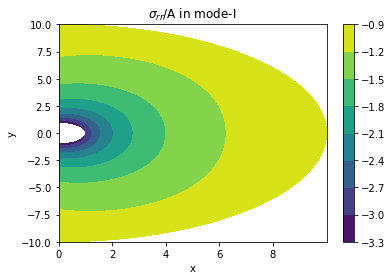

In [15]:
rbar = np.linspace(1, 10, 100)
tbar = np.linspace(-np.pi/2, np.pi/2, 100)
R, T = np.meshgrid(rbar, tbar)

sigmarr_num = -(3/2)*(1/R**0.5)*np.cos(T/2)*(3-np.cos(T))
sigmatt_num = -(3/2)*(1/R**0.5)*np.cos(T/2)*(1+np.cos(T))
sigmart_num =  (3/2)*(1/R**0.5)*np.sin(T/2)*(1+np.cos(T))

X, Y = R*np.cos(T), R*np.sin(T)

fig11,ax11 = plt.subplots(1,1)
cp= ax11.contourf(X,Y,sigmarr_num)
fig11.colorbar(cp)
ax11.set_title('$\sigma_{rr}$/A in mode-I')
ax11.set_xlabel('x')
ax11.set_ylabel('y')
plt.show()

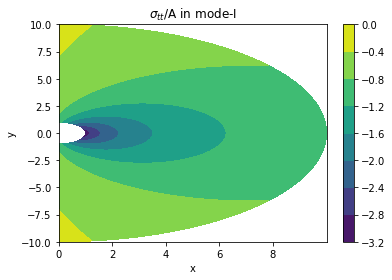

In [16]:
fig12,ax12 = plt.subplots(1,1)
cp= ax12.contourf(X,Y,sigmatt_num)
fig12.colorbar(cp)
ax12.set_title('$\sigma_{tt}$/A in mode-I')
ax12.set_xlabel('x')
ax12.set_ylabel('y')
plt.show()

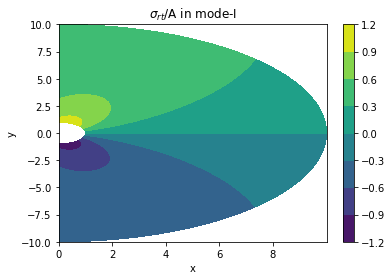

In [17]:
fig13,ax13 = plt.subplots(1,1)
cp= ax13.contourf(X,Y,sigmart_num)
fig13.colorbar(cp)
ax13.set_title('$\sigma_{rt}$/A in mode-I')
ax13.set_xlabel('x')
ax13.set_ylabel('y')
plt.show()

### For *Mode-II* crack -

In [18]:
sigma_rr_crack_II = sigma_rr_crack.subs(A,0)
sigma_tt_crack_II = sigma_tt_crack.subs(A,0)
sigma_rt_crack_II = sigma_rt_crack.subs(A,0)

display(Math(r' \sigma_{{rr}} = {}'.format(sp.latex(sigma_rr_crack_II))))
display(Math(r' \sigma_{{\theta \theta}} = {}'.format(sp.latex(sigma_tt_crack_II))))
display(Math(r' \sigma_{{r\theta}} = {}'.format(sp.latex(sigma_rt_crack_II))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

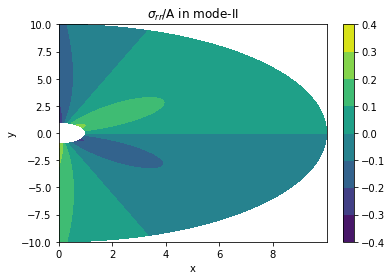

In [19]:
sigmarr_num = -(1/2)*(1/R**0.5)*np.sin(T/2)*(1-3*np.cos(T))
sigmatt_num = -(3/2)*(1/R**0.5)*np.cos(T/2)*(1+np.cos(T))
sigmart_num =  (1/2)*(1/R**0.5)*np.cos(T/2)*(1-3*np.cos(T))

X, Y = R*np.cos(T), R*np.sin(T)

fig21,ax21 = plt.subplots(1,1)
cp= ax21.contourf(X,Y,sigmarr_num)
fig21.colorbar(cp)
ax21.set_title('$\sigma_{rr}$/A in mode-II')
ax21.set_xlabel('x')
ax21.set_ylabel('y')
plt.show()

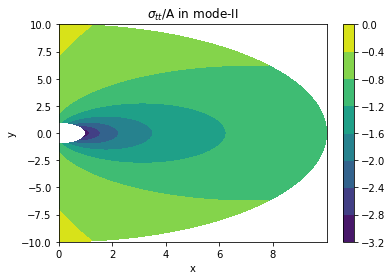

In [20]:
fig22,ax22 = plt.subplots(1,1)
cp= ax22.contourf(X,Y,sigmatt_num)
fig22.colorbar(cp)
ax22.set_title('$\sigma_{tt}$/A in mode-II')
ax22.set_xlabel('x')
ax22.set_ylabel('y')
plt.show()

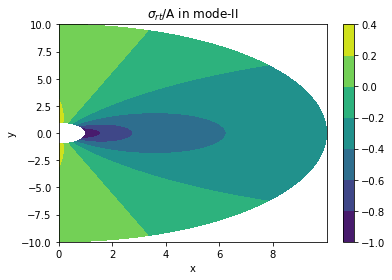

In [21]:
fig23,ax23 = plt.subplots(1,1)
cp= ax23.contourf(X,Y,sigmart_num)
fig23.colorbar(cp)
ax23.set_title('$\sigma_{rt}$/A in mode-II')
ax23.set_xlabel('x')
ax23.set_ylabel('y')
plt.show()

We will now generate the strains for each mode from the stresses obained.
## Strains for Mode-I type crack-

In [25]:
epsilonrr_I = epsilon_rr(sigma_rr_crack_I,sigma_tt_crack_I).collect(nu)
epsilontt_I = epsilon_tt(sigma_tt_crack_I,sigma_rr_crack_I).collect(nu)
epsilonrt_I = epsilon_rt(sigma_rt_crack_I)

display(Math(r'\epsilon_{{rr}} = {}'.format(sp.latex(epsilonrr_I))))
display(Math(r'\epsilon_{{\theta \theta}} = {}'.format(sp.latex(epsilontt_I))))
display(Math(r'\epsilon_{{r\theta}} = {}'.format(sp.latex(epsilonrt_I))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Strains for Mode-II type crack-

In [26]:
epsilonrr_II = epsilon_rr(sigma_rr_crack_II,sigma_tt_crack_II).collect(nu)
epsilontt_II = epsilon_tt(sigma_tt_crack_II,sigma_rr_crack_II).collect(nu)
epsilonrt_II = epsilon_rt(sigma_rt_crack_II)

display(Math(r'\epsilon_{{rr}} = {}'.format(sp.latex(epsilonrr_II))))
display(Math(r'\epsilon_{{\theta \theta}} = {}'.format(sp.latex(epsilontt_II))))
display(Math(r'\epsilon_{{r\theta}} = {}'.format(sp.latex(epsilonrt_II))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>